### Regresja przy użyciu biblioteki sklearn

Pobierzmy ponownie zbiór znany z poprzednich laboratoriów.

In [1]:
# Imports
import urllib.request
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.pylabtools import figsize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
plik = 'GDP_happiness.csv'
URL = "https://byes.pl/wp-content/uploads/datasets/" + plik
if not os.path.isfile(plik):
    print('Pobieram plik z ', URL)
    urllib.request.urlretrieve(URL, plik)
    print('Pobrano plik')
else:
    print(f'Plik {plik} już jest na dysku')

dane = pd.read_csv(plik, index_col=[0])
dane = dane.fillna(dane.mean(axis=0))
dane.tail()

display(dane)

X = dane['GDP per capita'].values
Y = dane['happiness'].values

Plik GDP_happiness.csv już jest na dysku


,GDP per capita,happiness
Belgium,133.000000,6.864
Bulgaria,28.200000,5.102
Czech Republic,67.400000,6.911
Denmark,172.500000,7.646
Germany,133.200000,7.076
Estonia,68.100000,6.022
Ireland,231.900000,7.094
Greece,54.900000,5.515
Spain,84.800000,6.401
France,115.400000,6.664


### Metody z biblioteki [Scikit-learn](https://scikit-learn.org/stable/)

Metody uczenia maszynowego, czy to do klasyfikacji, regresji, grupowania, czy dopasowywania rozkładów do danych, dostępne w bibliotece Scikit-learn nazywane są - nie wiedzieć czemu - *estymatorami*. <br>
Sposób korzystania z każdego estymatora został ujednolicony. Oto przykład regresji liniowej.

In [3]:
from sklearn.linear_model import LinearRegression

2. Utworzenie instancji

In [4]:
model_lin = LinearRegression()

3. Dopasowanie *estymatora* do danych metodą ```fit```: patrz komentarz pod algorytmem (4).

In [5]:
model_lin.fit(X.reshape(-1,1), Y)

LinearRegression()

4. Obliczenia/predykcje z wykorzystaniem metody ```predict``` *estymatora*

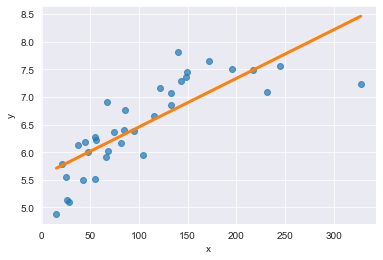

In [6]:
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
Y_pred = model_lin.predict(X_test.reshape(-1,1))

plt.scatter(X,Y, alpha=0.7)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Można też sprawdzić wartości parametrów otrzymanego modelu liniowego.

In [7]:
print(f'Parametry modelu liniowego: a = {np.round(model_lin.coef_,5)}, b = {np.round(model_lin.intercept_,5)}')

Parametry modelu liniowego: a = [0.0088], b = 5.57619


Oto inne ważne czynności, które wykonuje się w ramach dopasowywania modelu do danych.

Podział zbioru na część do trenowania i testowania

In [8]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(26,) (9,) (26,) (9,)


Wskaźnik jakości modelu:

In [9]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)), squared=False)

0.4736465020244737

**Ćwiczenie 1:** Korzystając z dokumentacji sklearn oblicz dla powyższych danych pierwiastek błędu średniokwadratowego (ang. root mean square error).

In [10]:
mean_squared_error(Y, model_lin.predict(X.reshape(-1,1)), squared=True)

0.22434100888001982

Oto **przykład** demonstrujący jednolitość obsługi *estymatorów* biblioteki Scikit-learn:

In [11]:
X = dane['GDP per capita'].values
Y = dane['happiness'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)


# =========  Model liniowy =========
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), Y_train)

print(f'Parametry modelu liniowego: {np.round(model_lin.coef_,5)}, {np.round(model_lin.intercept_,5)}')
MSE_lin = mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu liniowego: {MSE_lin:0.3}\n')


Parametry modelu liniowego: [0.0118], 5.27664
Błąd średniokwadratowy modelu liniowego: 0.603



In [12]:
# ===== Uogólniony model liniowy (ang. Generalized Linear Model) =====
from sklearn.preprocessing import PolynomialFeatures
model_GLM = LinearRegression()
gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), Y_train)

print(f'Parametry modelu GLM: {np.round(model_GLM.coef_,4)}, {np.round(model_GLM.intercept_,5)}')
MSE_GLM = mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1))))
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM:0.3}\n')

Parametry modelu GLM: [ 0.      0.0269 -0.0001], 4.65749
Błąd średniokwadratowy modelu GLM: 0.229



In [13]:
#==== Maszyna wektorów wspierających (ang. Support Vector Machine) ====
# SVR dla regresji, SVC dla klasyfikacji
from sklearn.svm import SVR
model_svr = SVR(kernel='rbf', gamma='scale', C=1)

model_svr.fit(X_train.reshape(-1,1), Y_train)
MSE_SVR = mean_squared_error(Y_test, model_svr.predict(X_test.reshape(-1,1)))
print(f'Błąd średniokwadratowy modelu SVR: {MSE_SVR:0.3}')

Błąd średniokwadratowy modelu SVR: 0.258


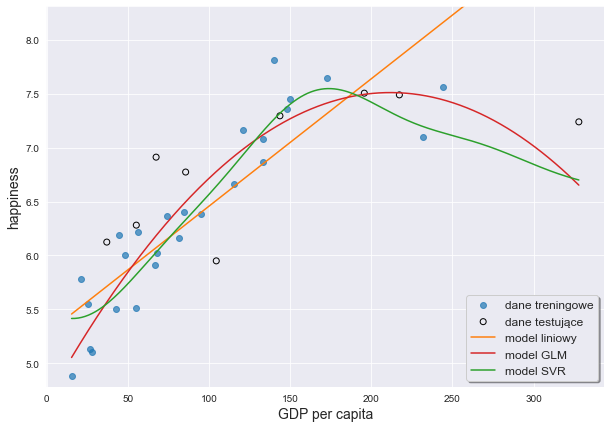

In [14]:
# Predykcje wszystkich modeli dla całego zakresów osi X
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))
y_svr_pred = model_svr.predict(os_x.reshape(-1,1))

# Wizualizacja
plt.figure(figsize=(10,7))
plt.scatter(X_train, Y_train, label='dane treningowe', alpha=0.7)
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')
plt.plot(os_x, y_lin_pred, label='model liniowy', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label=f'model GLM', color='tab:red')
plt.plot(os_x, y_svr_pred, label='model SVR', color='tab:green')
plt.xlabel(dane.columns[0], fontsize=14)
plt.ylabel(dane.columns[1], fontsize=14)
plt.legend(fontsize=12, shadow=True, loc='lower right')
plt.ylim([Y.min()-0.1, Y.max()+0.5])
plt.show()

**Ćwiczenie 2:** Wykonaj wielokrotne dopasowania modeli do różnych podziałów zbioru danych na część do trenowania i do testowania. Wyciągnij wnioski. <br>
Jak oceniasz adekwatność każdego z modeli, tzn. czy poprawnie opisuje tendencje obserwowane w danych? <br>
Jaki kolejny model proponujesz rozważyć? <br>
Jak można ocenić adekwatność modelu w przypadku danych wielowymiarowych?

Jeżeli powtórzymy dopasowania dla różnych podziałów na zbiór testowy, to otrzymamy inne wyniki, ale rozkład tych błędów będzie coraz bardziej przypominał rozkład normalny.

W przypadku danych wielowymiarowych nie jesteśmy w stanie ocenić dopasowania wizualnie, więc pozostają metryki liczbowe.

Text(0.5, 1.0, 'Errors for SVR')

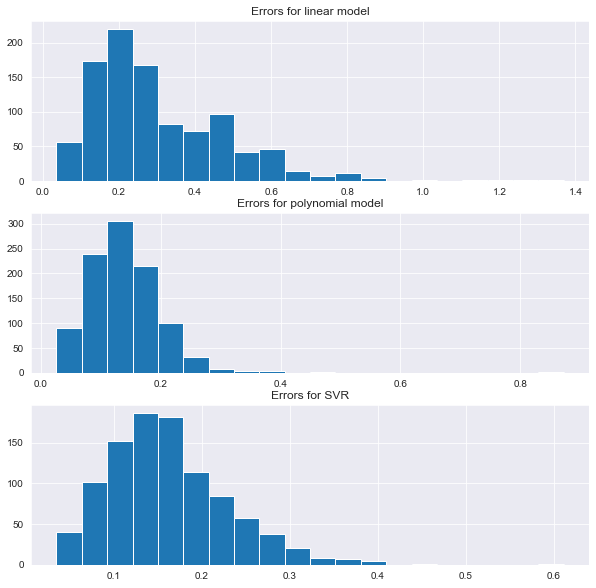

In [15]:
def different_splits_for_model(n, model, X, Y, metric, arg_transformer=None):
    errors = np.empty(n)
    for i in range(n):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
        X_train, X_test = X_train.reshape(-1, 1), X_test.reshape(-1, 1)
        if arg_transformer:
            X_train = arg_transformer.fit_transform(X_train)
            X_test = arg_transformer.transform(X_test)
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        errors[i] = metric(Y_test, predictions)
    return errors

repetitions = 1000

figsize(10, 10)
plt.subplot(311)
plt.hist(different_splits_for_model(repetitions, model_lin, X, Y, mean_squared_error),
         bins=20)
plt.title('Errors for linear model')

plt.subplot(312)
plt.hist(different_splits_for_model(repetitions, model_GLM, X, Y, mean_squared_error, arg_transformer=gen_features), bins=20)
plt.title('Errors for polynomial model')

plt.subplot(313)
plt.hist(different_splits_for_model(repetitions, model_svr, X, Y, mean_squared_error),
         bins=20)
plt.title('Errors for SVR')

### Wykorzystanie SVM do zadania klasyfikacji na podstawie zbioru Iris
W celu przetestowania maszyny wektorów nośnych na problemie klasyfikacji, pobierzmy zbiór Iris.

Zbiór danych Iris zawiera pomiary cech trzech różnych gatunków roślin z rodzaju kosaciec (ang. iris). Zbiór ten zawiera cztery cechy dla każdego z 150 obserwowanych kwiatów - długość i szerokość działek kielicha oraz płatków oraz długość i szerokość słupka.

Wszystkie wartości pomiarów zostały znormalizowane do jednostek centymetrów. Zbiór ten jest często wykorzystywany w zadaniach klasyfikacji i uczenia maszynowego jako przykład problemu wieloklasowej klasyfikacji.

<!-- . It contains measurements of physical features of three species of iris flowers: Iris setosa, Iris versicolor, and Iris virginica. The measurements include the length and width of the petals and sepals of each flower, which were collected by the statistician Ronald Fisher in 1936. The dataset has become a classic example of data analysis and machine learning due to its simplicity and versatility, and is commonly used for classification tasks, data visualization, and exploratory data analysis. -->

In [16]:
from sklearn import datasets
iris = datasets.load_iris()

Badania eksploracyjne mające na celu poznanie istoty problemu oraz zbadanie danych na jakich się opieramy to pierwszy krok do rozwiązania problemu

In [17]:
X = iris.data  # dane wejściowe
y = iris.target  # dane wyjściowe

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Ćwiczenie 3:** Wykonaj badania eksploracyjne (ang. exploratory data analysis) i odpowiedz na następujące pytania:
1) z jakich danych składają się dane wejściowe i dane wyjściowe?
2) jaka jest sumaryczna liczba próbek?
3) jaka jest liczba różnych klas kwiatów?
4) ile próbek zawiera każda z klas? Czy klasy są zbalansowane?
5) jakie są średnia i odchylenie standardowe cechy `petal width (cm)`?

In [19]:
print("Data types: ", X.dtype, y.dtype)
print("Number of samples: ", X.shape[0])
print("Different classes: ", np.unique(y))
print("Count of classes: ")
print("0: ", sum(y == 0))
print("1: ", sum(y == 1))
print("2: ", sum(y == 2))
petal_width = X[:, -1]
print(petal_width.mean(), petal_width.std())

Data types:  float64 int32
Number of samples:  150
Different classes:  [0 1 2]
Count of classes: 
0:  50
1:  50
2:  50
1.1993333333333336 0.7596926279021594


**Ćwiczenie 4:** Wykorzystaj metodę `train_test_split` i podziel zbiór danych na podzbiory treningowy oraz testowy w stosunku 75:25 z wykorzystaniem ziarna losowości o wartości 13 oraz wykorzystując przetasowanie (ang. shuffle) danych.


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True,
                                                    random_state=13)

W sklearn modele klasyfikacji tworzymy w analogiczny sposób jak modele regresji.

In [21]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

Dobrą praktyką, zanim przekażemy dane do klasyfikatora, jest przeskalowanie ich.

Ma to na celu zapewnienie równego znaczenia każdej z cech. Z racji, iż SVM próbuje znaleźć optymalną granicę decyzyjną, która separuje klasy w przestrzeni cech, to jeśli cechy wejściowe używają różnych skali, to niektóre z nich mogą mieć większy zakres wartości niż inne. To może powodować, że SVM położy większy nacisk na cechy o większych skalach, a więc nierównomiernie uwzględnieni (bardziej skupi się) poszczególne z nich w procesie uczenia.



W tym celu wykorzystajmy API sklearn, a dokładniej klasę `StandardScaler`. Podobnie jak w przypadku modeli - tutaj również wywołujemy funkcję `fit()`.

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

**Ćwiczenie 5:** jak zmieniły się wartości poszczególnych cech po skalowaniu? 

In [23]:
columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df_before_scaling = pd.DataFrame(data=np.r_[X_train, X_test], columns=columns)
df_after_scaling = pd.DataFrame(data=np.r_[X_train_sc, X_test_sc], columns=columns)

print(df_before_scaling.describe())
print(df_after_scaling.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.040569          0.054408        

Podobnie jak w przypadku modeli regresji funkcja `fit()` jest używana do trenowania modelu na danych treningowych problemu klasyfikacji.

Funkcja `predict()` zwraca przewidywane etykiety dla danych testowych, które wcześniej nie były używane do dopasowania modelu.

In [24]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

### Ocena jakości modelu klasyfikacji

Na poprzednich laboratoriach poznaliśmy sposoby oceny jakości predykcji modelu regresji. W zagadnieniu klasyfikacji również istnieje szereg metod pozwalających na takową ocenę - stosować je będziemy w zależnosci od problemu.

Tablica pomyłek (ang. confusion matrix) to macierz $N\times N$, gdzie $N$ to liczba klas docelowych. Jest ona używana do oceny wyników modeli klasyfikacyjnych. Jedna z osi przedstawia prawdziwe klasy, podczas gdy druga - predykowane przez nasz model. Wartości w odpowiednich komórkach mówią o tym ile próbek zostało zaklasyfikowanych w dany sposób.

Intuicyjnie dążymy do tego, by otrzymać jak najwiecęj wartości po przekątnej - tzn. by jak najwięcej klas było predykowanych jako te właściwe.

[[12  0  0]
 [ 0 10  0]
 [ 0  1 15]]


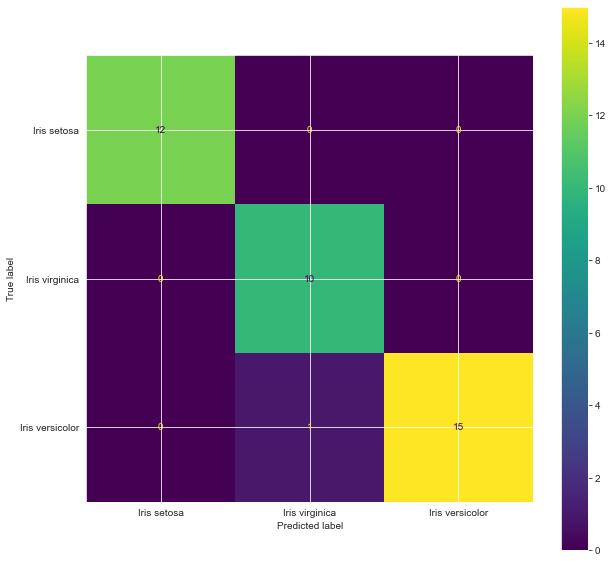

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=[clf.classes_])
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
   display_labels=["Iris setosa", "Iris virginica", "Iris versicolor"],
)
disp.plot()
print(cm)
plt.show()

**Ćwiczenie 6:** Opisz jakie błędy popełnił klasyfikator.

Klasyfikator zakwalifikował jedną próbkę Iris versicolor jako Iris virginica

Bazując na tablicy pomyłek jesteśmy w stanie policzyć różne metryki klasyfikacji. Najbardziej podstawową z nich jest dokładność (ang. accuracy).

\begin{equation}
\text{Dokładność} = \frac{\text{liczba poprawnie zaklasyfikowanych próbek}}{\text{liczba wszystkich próbek}}
\end{equation}

**Ćwiczenie 7**: wykorzystując bibliotekę sklearn (moduł `sklearn.metrics`) oblicz wartość dokładności dla predykcji zbioru testowego Iris. Czy wyniki osiągnięte przez klasyfikator można uznać za dobre?

In [26]:


accuracy_score(y_test, y_pred)

0.9736842105263158

Podstawą poprawnego wykonania zadania jest dobranie odpowiednich narzędzi - dokładność nie zawsze jest najlepszą metryką. Chcąc przedstawić bardziej miarodajne wnioski warto jest używać metryk takich jak precyzja (ang. precision), czułość (ang. recall) lub F1-score - przeczytaj o nich więcej w domu.

Specjalnym przypadkiem są zbiory danych, które nie są zbalansowane. W takim przypadku możemy otrzymać wysoką precyzję, ale model nie będzie spełniał swojej funkcji.

In [27]:
churn_customer = pd.read_csv(r"C:\Users\julia\PycharmProjects\MSiD\data\churn_customers.csv")
churn_customer.head()
churn_customer.columns = [col.lower() for col in churn_customer.columns]
churn_customer['churn'] = (churn_customer['churn'] == 'Yes').astype(int)
churn_customer.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [28]:
df_train_full, df_test = train_test_split(churn_customer, test_size=0.2)
df_train, df_val = train_test_split(df_train_full, test_size=0.33)

In [29]:
missing_rows = churn_customer.totalcharges == " "
churn_customer.loc[missing_rows, 'totalcharges'] = churn_customer.loc[missing_rows, 'tenure'] * churn_customer.loc[missing_rows, 'monthlycharges']
churn_customer['totalcharges'] = churn_customer['totalcharges'].astype(float)

In [30]:
churn_customer.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [31]:
print(churn_customer['churn'].mean())

0.2653698707936959


DictVectorizer to klasa służąca do kodowania wartości kategorialnych na wartości liczbowe (0, 1, ...) tj. stosująca kodowanie 'one-of-K' albo 'one-hot'. Wejściem do tego transformatora są listy słowników atrybut-wartość, gdzie wartości są skończone, przeliczalne. Jeżeli dany atrybut jest wartością liczbową, to nie jest on zmieniony.

In [32]:
from sklearn.feature_extraction import DictVectorizer

numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']

vec = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
print(train_dict[0])

X_train = vec.fit_transform(train_dict)
print(X_train[-2])
y_train = df_train['churn']

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = vec.transform(val_dict)
y_val = df_val['churn']

{'gender': 'Male', 'seniorcitizen': 0, 'partner': 'No', 'dependents': 'No', 'phoneservice': 'Yes', 'multiplelines': 'No', 'internetservice': 'No', 'onlinesecurity': 'No internet service', 'onlinebackup': 'No internet service', 'deviceprotection': 'No internet service', 'techsupport': 'No internet service', 'streamingtv': 'No internet service', 'streamingmovies': 'No internet service', 'contract': 'Month-to-month', 'paperlessbilling': 'No', 'paymentmethod': 'Mailed check', 'tenure': 3, 'monthlycharges': 20.7, 'totalcharges': '57.5'}
[1. 0. 0. ... 0. 0. 0.]


In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\julia\anaconda3\envs\DataCampTutorials\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
model.predict_proba(X_val)

array([[0.99750574, 0.00249426],
       [0.60948281, 0.39051719],
       [0.76754933, 0.23245067],
       ...,
       [0.80109723, 0.19890277],
       [0.6385222 , 0.3614778 ],
       [0.92667324, 0.07332676]])

In [50]:
y_pred = model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
churn_customer.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [37]:
threshold = 0.5
np.mean(y_pred < threshold)

0.7586021505376344

In [38]:
baseline = np.repeat(False, len(churn_customer))
naive_acc = accuracy_score(baseline, churn_customer['churn'])
naive_acc

0.7346301292063041

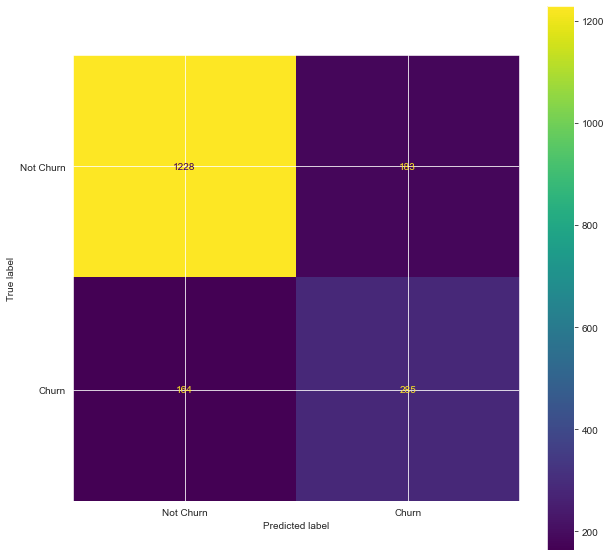

In [39]:
conf_matrix = confusion_matrix(y_pred, y_val)
ConfusionMatrixDisplay(
    conf_matrix,
    display_labels=['Not Churn', 'Churn']
).plot()

In [40]:
model_acc = accuracy_score(y_val, y_pred)
model_acc

0.8134408602150538

In [41]:
model_acc - naive_acc

0.07881073100874969

W porównaniu z naiwnym modelem mamy wzrost o ok. 6%. Czy to dużo? W przypadkach gdy zbiory nie są zbalansowane warto posłużyć się macierzą pomyłek, ponieważ metryka dokładności nie jest miarodajna.

In [47]:
import homeworks.homework_classification.classification as classification_metrics

print(classification_metrics.precision_score(y_val, y_pred))
print(classification_metrics.recall_score(y_val, y_pred))
print(classification_metrics.f1_score(y_val, y_pred))

0.6347438752783965
0.6089743589743589
0.6215921483097057


Jeżeli założymy, że do użytkowników skategoryzowanych jako "churn" wysyłamy mail'a, to metryki mówią nam
1. Precyzja = 63% oznacza, że 63% z użytkowników, do których wysłaliśmy maile naprawdę odeszła (37% użytkowników to 'fałszywe alarmy')
2. Recall = 61% oznacza, że z wszystkich użytkowników, którzy naprawdę odeszli, tylko do 61% z nich dotarliśmy.

To czy stawiać na wyższą precyzję czy pamięć zależy od celu: na precyzję np. w zadaniu klasyfikacji wiadomości jako spam, gdy jednak nie chcemy aby jakaś ważna wiadomość była zaliczona jako spam; pamięć w zadaniu klasyfikacji nowotworu, gdy osoba jest chora, to chcemy mieć pewność, że algorytm to wykryje.

Podane wartości metryk są dla jednego progu - możemy być też zainteresowani jak algorytm się sprawdza w przypadku różnych progów. Do tego służą krzywe AUC i ROC

#### Krzywe ROC i AUC

Roc (Receiver Operating Characteristic) służy do ewaluacji jak dobrze model rozdziela klasę pozytywną i negatywną. Do obliczenia tej wartości potrzebujemy dwóch metryk $TPR = \frac{TP}{TP + FN}$ oraz $FPR = \frac{FP}{FP + TN}$

In [49]:
TPR = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
FPR = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
print(f"TPR = {TPR}")
print(f"FPR = {FPR}")

TPR = 0.6347438752783965
FPR = 0.12969525159461376


Algorytmy klasyfikacji binarnej zwykle zwracają prawdopodobieństwo, które jest następnie zamieniane na wartość binarną - 0 lub 1. Teraz będziemy chcieli ewaluować model dla różnych progów.

In [60]:
def calculate_tpr_fpr(y_true, probabilities):
    scores = []
    thresholds = np.linspace(0, 1, 101)
    for t in thresholds:
        pred_classes = (probabilities >= t)
        scores.append((t, *classification_metrics.get_quality_factors(y_true, pred_classes)))

    df_scores = pd.DataFrame(data=scores, columns=["t", "tn", "fp", "fn", "tp"])
    df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])

    return df_scores

prob_class_1 = model.predict_proba(X_val)[:, 1]

df_churn_scores = calculate_tpr_fpr(y_val, prob_class_1)

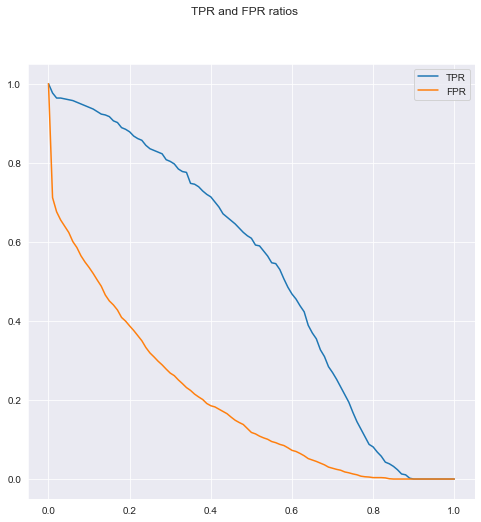

In [61]:
figsize(8, 8)
plt.plot(df_churn_scores['t'], df_churn_scores['tpr'], label='TPR')
plt.plot(df_churn_scores['t'], df_churn_scores['fpr'], label='FPR')
plt.legend()
_ = plt.suptitle("TPR and FPR ratios")

Aby lepiej zrozumieć wielkości TPR i FPR wykreślimy je dla losowego modelu

In [59]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [62]:
df_rand = calculate_tpr_fpr(y_val, y_rand)

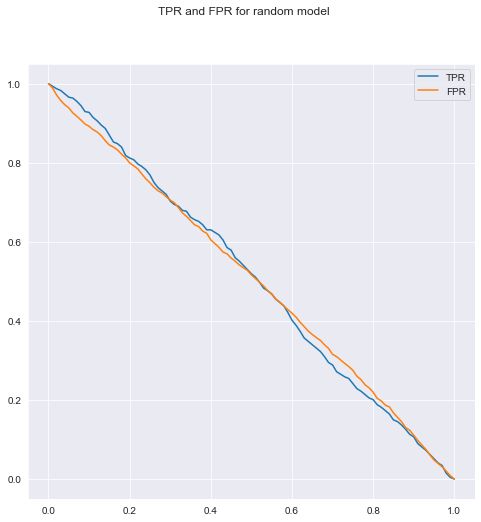

In [64]:
figsize(8, 8)
plt.plot(df_rand['t'], df_rand['tpr'], label='TPR')
plt.plot(df_rand['t'], df_rand['fpr'], label='FPR')
plt.legend()
_ = plt.suptitle("TPR and FPR for random model")

Dla progu=0 wszyscy są klasyfikowani jako nie-odchodzący, a dla progu=1 wszyscy jako odchodzący. Dla progu np. 0.4 z wszystkich odchodzących udało nam się zakwalifikować 60% (TPR), a 60% z zakwalifikowanych jako odchodzący tak naprawdę nie jest odchodząca.

Następnie wykreślimy te krzywe dla idealnego modelu - jest to model, który przypisuje prawdziwie pozytywnym przypadkom zawsze wyższe prawdopodobieństwo. Taki model jest nierealny oczywiście.

In [66]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_pos + num_neg)

df_ideal = calculate_tpr_fpr(y_ideal, y_pred_ideal)

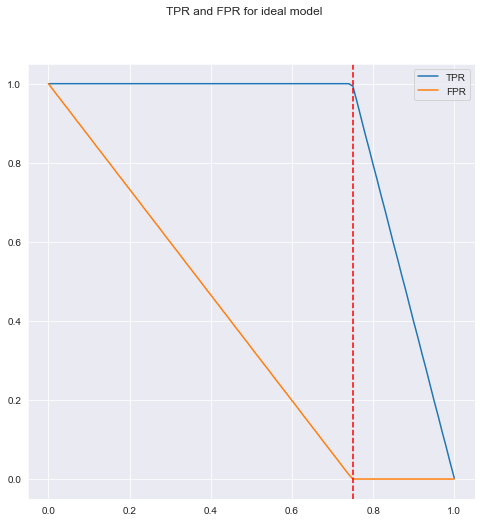

In [79]:
t_change = df_ideal.loc[df_ideal['tpr'] < 1.0, 't'].values[0]

figsize(8, 8)
plt.plot(df_ideal['t'], df_ideal['tpr'], label='TPR')
plt.plot(df_ideal['t'], df_ideal['fpr'], label='FPR')
plt.axvline(t_change, linestyle='dashed', color='r', ymax=1.0)
plt.legend()
_ = plt.suptitle("TPR and FPR for ideal model")

Aby stworzyć krzywą ROC, to wykreślamy TPR i FPR na dwóch osiach wykresu.

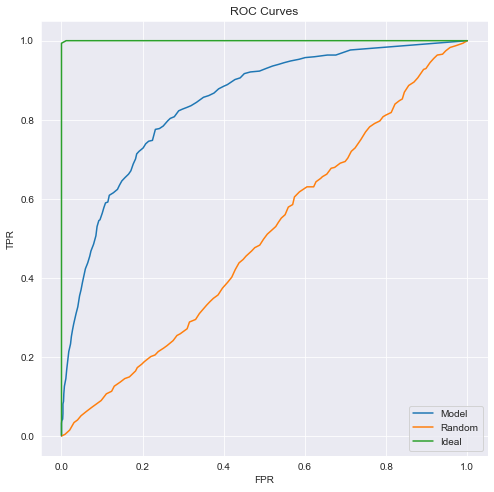

In [82]:
figsize(8, 8)
plt.plot(df_churn_scores.fpr, df_churn_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title("ROC Curves")
_ = plt.legend()

Idealnie model powinien znajdować się blisko krzywej idealnej i daleko od krzywej losowej, czyli gdzieś pomiędzy.

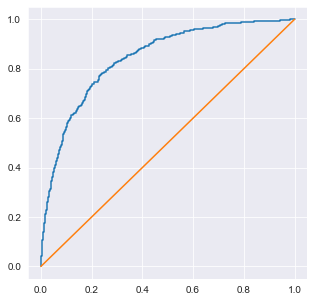

In [86]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, prob_class_1)
figsize(5, 5)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])

#### AUC
AUC to skrót od Area Under Curve, a bardziej szczegółowo mamy na myśli pole pod krzywą ROC. Podsumowuje ona metrykę jedną wartością. W zalezności od niej oceniamy jak dobry jest model:
1. 0.5 oznacza losowy model
2. 0.6 oznacza dosyć słaby model
3. 0.7 oznacza średni model
4. 0.9 oznacza dobry model

Im większe pole, tym bardziej krzywa jest nakierowana na punkt (0, 1), więc tym lepiej.
AUC posiada interpretację probabilistyczną: oznacza ona prawdopodobieństwo, że przypadkowa próbka o klasie pozytywnej będzie miała większe prawdopodobieństwo niż przypadkowa próbka o klasie negatywnej.

In [88]:
from sklearn.metrics import auc, roc_auc_score

print(auc(df_churn_scores.fpr, df_churn_scores.tpr))
print(roc_auc_score(y_val, prob_class_1))

0.8422786803713529
0.8430761248649179


### Wizualizacja parametrów SVM

Poniższy kod wizualizuje granice decyzyjne dla różnych przykładów SVMów. Poeksperymentuj poprzez podanie różnych wartości parametrów.


Oryginalna implementacja poniższego kodu znajduje się [tutaj](https://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py).

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Chcemy analizować klasyfikację tylko pomiędzy dwiema klasami
X = X[y != 0, :2]
y = y[y != 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42, shuffle=True)

y_train = y_train.astype(float)
y_test = y_test.astype(float)

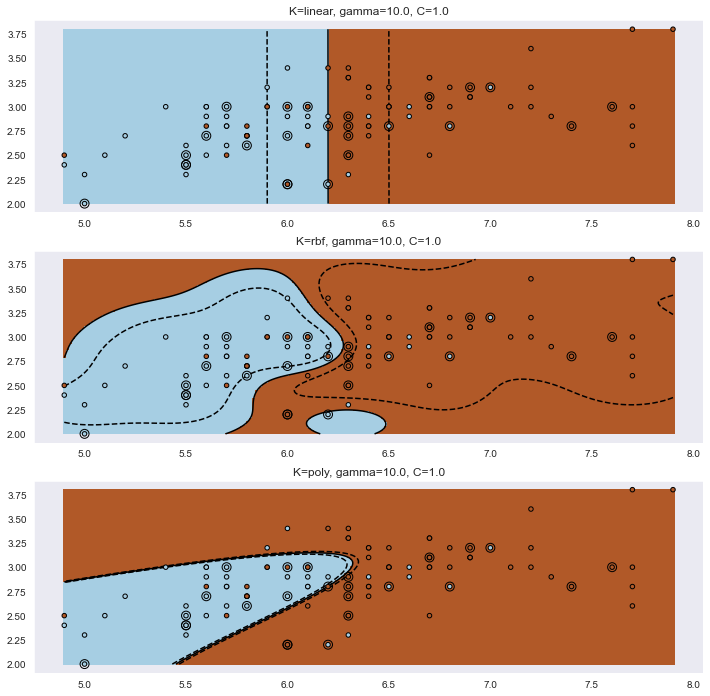

In [43]:
# Podstawowe parametry do modyfikacji, więcej parametrów znajdziesz na https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
C = 1.0
gamma = 10.0

figsize(12, 12)

def visualize_svc(kernel, gamma, C, ax):
    clf = svm.SVC(kernel=kernel, gamma=gamma, C=C)
    clf.fit(X_train, y_train)
    # Zwizualizuj wszystkie próbki
    ax.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Zaznacz okręgiem dane testowe
    ax.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    ax.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Wykreśl granicę decyzyjną
    Z = Z.reshape(XX.shape)
    ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    ax.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    ax.set_title("K=" + str(kernel) + ", gamma=" + str(gamma) + ", C=" + str(C))

# Wygeneruj wizualizację dla każdego z modeli

fig, axes = plt.subplots(3, 1)

for i, kernel in enumerate(["linear", "rbf", "poly"]):
    visualize_svc(kernel, gamma, C, axes[i])

**Ćwiczenie 8**: Poznaliśmy do tej pory różne parametry maszyny wektorów nośnych (C, gamma) oraz operacje które warto wykonać przed przekazaniem danych do modelu (skalowanie danych). Sprawdź wpływ ww. czynników na wyniki SVM na zbiorze Iris. Pamiętaj o zachowaniu miarodajności wyników poprzez użycie tych samych zbiorów oraz losowości!

C:\Users\julia\AppData\Local\Temp\ipykernel_7424\1860391937.py:32: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\julia\AppData\Local\Temp\ipykernel_7424\1860391937.py:32: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\julia\AppData\Local\Temp\ipykernel_7424\1860391937.py:32: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\julia\AppData\Local\Temp\ipykernel_7424\1860391937.py:32: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\julia\AppData\Local\Temp\ipykernel_7424\1860391937.py:32: UserWarning: No contour levels were found within the data range.
  ax.contour(
C:\Users\julia\AppData\Local\Temp\ipykernel_7424\1860391937.py:32: UserWarning: No contour levels were found within the data range.
  ax.contour(


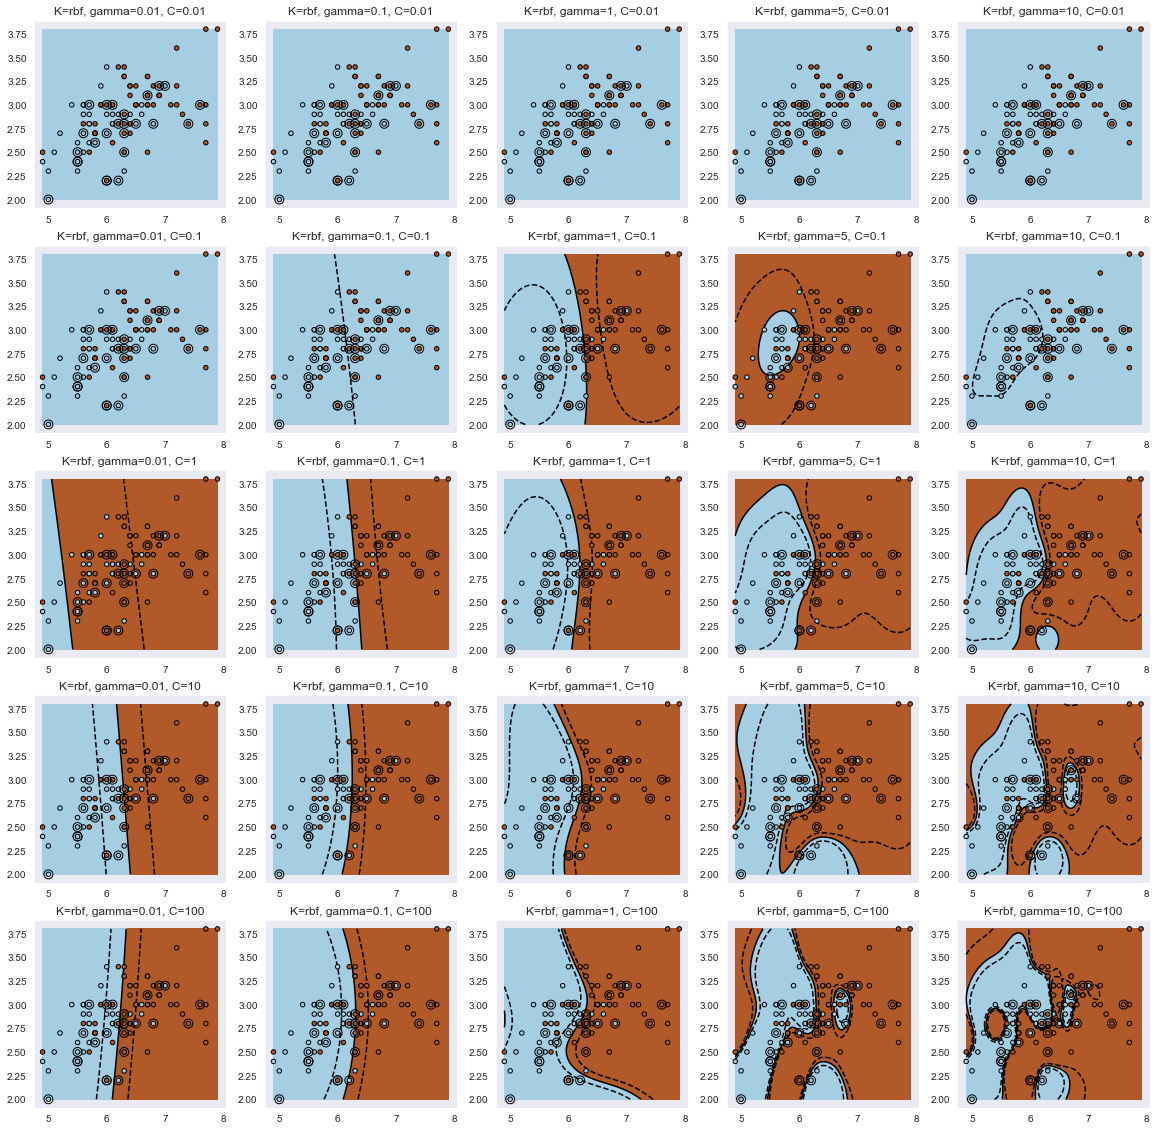

In [44]:
C_parameter = [0.01, 0.1, 1, 10, 100]
gamma_parameter = [0.01, 0.1, 1, 5, 10]
kernel = 'rbf'

figsize(20, 20)

n_rows = len(C_parameter)
n_cols = len(gamma_parameter)

fig, axes = plt.subplots(n_rows, n_cols)

for r, C_p in enumerate(C_parameter):
    for c, gamma_p in enumerate(gamma_parameter):
        visualize_svc(kernel, gamma_p, C_p, axes[r, c])